In [2]:
import pandas as pd
import tensorflow.compat.v1 as tf
from matplotlib import pyplot as plt
import collections
from sklearn.model_selection import train_test_split
import numpy as np
tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
sales = pd.read_csv("DataSet/start_vgsales.csv")
steam = pd.read_csv("./DataSet/start_steam-200k.csv", header=None).iloc[:,:-1]
steam.columns = ["player_id", "game_title", "type", "value"]

C:\Users\david\AppData\Local\Temp\ipykernel_17048\2428941492.py:2: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  steam = pd.read_csv("./DataSet/start_steam-200k.csv", header=None).iloc[:,:-1]


In [4]:
steam = steam[steam["type"] == "purchase"]

In [5]:
df = steam.merge(sales, how='inner',left_on="game_title", right_on="Name")
df.head()

,player_id,game_title,type,value,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,151603712,Fallout 4,purchase,1.0,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
1,151603712,Fallout 4,purchase,1.0,288,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09
2,151603712,Fallout 4,purchase,1.0,1632,Fallout 4,PC,2015.0,Role-Playing,Bethesda Softworks,0.50,0.63,0.00,0.10,1.23
3,87445402,Fallout 4,purchase,1.0,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
4,87445402,Fallout 4,purchase,1.0,288,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09


In [6]:
df2 = df[["player_id", "Genre", "value"]]
df2 = df2.groupby(["player_id", "Genre"]).count()

In [7]:
pivoted = df2.reset_index().pivot_table(values = "value", columns="Genre", index="player_id").fillna(0)
genre_counts = pivoted.apply(lambda x: x != 0, axis=1).sum(axis=1)
pivoted = pivoted[genre_counts >= 2]
pivoted

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
player_id,,,,,,,,,,,,
86540,7.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,25.0,0.0,0.0,4.0
561758,17.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,54.0,1.0,5.0,6.0
948368,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0
2110581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,0.0
2753525,21.0,0.0,1.0,3.0,0.0,0.0,0.0,6.0,37.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99264709,24.0,0.0,3.0,0.0,2.0,0.0,0.0,7.0,14.0,0.0,0.0,3.0
99374297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0
9946133,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [40]:
pivoted = pivoted.apply(lambda x: x/sum(x), axis=1)
pivoted.head(10)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
player_id,,,,,,,,,,,,
86540,0.162791,0.046512,0.000000,0.000000,0.0,0.0,0.116279,0.000000,0.581395,0.000000,0.000000,0.093023
561758,0.197674,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.034884,0.627907,0.011628,0.058140,0.069767
948368,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.375000,0.000000,0.625000,0.000000,0.000000,0.000000
2110581,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.200000,0.800000,0.000000,0.000000,0.000000
2753525,0.295775,0.000000,0.014085,0.042254,0.0,0.0,0.000000,0.084507,0.521127,0.000000,0.042254,0.000000
5387470,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.600000,0.066667,0.000000,0.000000
5860071,0.833333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000
5976642,0.000000,0.250000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000
5990132,0.100000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.100000,0.500000,0.000000,0.300000


In [60]:
pivoted.sum()

Genre
Action          567.997356
Adventure        32.645992
Fighting          8.792560
Misc              5.335415
Platform         46.952996
Puzzle            8.265811
Racing           69.018614
Role-Playing    176.921881
Shooter         592.504254
Simulation       41.699950
Sports           71.521085
Strategy        124.344085
dtype: float64

In [9]:
# @title CFModel helper class (run this cell)
class CFModel(object):
  """Simple class that represents a collaborative filtering model"""
  def __init__(self, embedding_vars, loss, metrics=None):
    """Initializes a CFModel.
    Args:
      embedding_vars: A dictionary of tf.Variables.
      loss: A float Tensor. The loss to optimize.
      metrics: optional list of dictionaries of Tensors. The metrics in each
        dictionary will be plotted in a separate figure during training.
    """
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None

  @property
  def embeddings(self):
    """The embeddings dictionary."""
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.
    Args:
      iterations: number of iterations to run.
      learning_rate: optimizer learning rate.
      plot_results: whether to plot the results at the end of training.
      optimizer: the optimizer to use. Default to GradientDescentOptimizer.
    Returns:
      The metrics dictionary evaluated at the last iteration.
    """
    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)
      local_init_op = tf.group(
          tf.variables_initializer(opt.variables()),
          tf.local_variables_initializer())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()

    with self._session.as_default():
      local_init_op.run()
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]
      print(metrics_vals)
      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)
          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()

      if plot_results:
        # Plot the metrics.
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results

In [53]:
def split_dataframe(df, holdout_fraction=0.1):
  """Splits a DataFrame into training and test sets.
  Args:
    df: a dataframe.
    holdout_fraction: fraction of dataframe rows to use in the test set.
  Returns:
    train: dataframe for training
    test: dataframe for testing
  """
  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
  """
  Args:
    sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.gather_nd(
      tf.matmul(user_embeddings, movie_embeddings, transpose_b=True),
      sparse_ratings.indices)
  loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)
  return loss

def gravity(U, V):
  """Creates a gravity loss given two embedding matrices."""
  return 1. / (U.shape[0].value*V.shape[0].value) * tf.reduce_sum(
      tf.matmul(U, U, transpose_a=True) * tf.matmul(V, V, transpose_a=True))

In [17]:
def build_rating_sparse_tensor(df):
    test = tf.convert_to_tensor(df.values.T)
    test = tf.sparse.from_dense(test)
    return test

In [57]:
def build_model(genres, embedding_dim=3, init_stddev=1.):
  """
  Args:
    ratings: a DataFrame of the ratings
    embedding_dim: the dimension of the embedding vectors.
    init_stddev: float, the standard deviation of the random initial embeddings.
  Returns:
    model: a CFModel.
  """
  # Split the ratings DataFrame into train and test.
  train_ratings, test_ratings = split_dataframe(genres)
  # SparseTensor representation of the train and test datasets.
  A_train = build_rating_sparse_tensor(train_ratings)
  A_test = build_rating_sparse_tensor(test_ratings)
  # Initialize the embeddings using a normal distribution.
  U = tf.Variable(tf.random_normal(
      [A_train.shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.shape[1], embedding_dim], stddev=init_stddev))
  print(f"U: {U.shape}")
  print(f"V: {V.shape}")
  print(f"matrix: {genres.shape}")
  train_loss = sparse_mean_square_error(A_train, U, V)
  test_loss = sparse_mean_square_error(A_test, U, V)
  metrics = {
      'train_error': train_loss,
      'test_error': test_loss
  }
  embeddings = {
      "genres": U,
      "users": V
  }
  return CFModel(embeddings, train_loss, [metrics])

In [55]:
def build_regularized_model(
    genres, embedding_dim=3, regularization_coeff=.1, gravity_coeff=1.,
    init_stddev=0.1):
  """
  Args:
    ratings: the DataFrame of movie ratings.
    embedding_dim: The dimension of the embedding space.
    regularization_coeff: The regularization coefficient lambda.
    gravity_coeff: The gravity regularization coefficient lambda_g.
  Returns:
    A CFModel object that uses a regularized loss.
  """
  # Split the ratings DataFrame into train and test.
  train_ratings, test_ratings = split_dataframe(genres)
  # SparseTensor representation of the train and test datasets.
  A_train = build_rating_sparse_tensor(train_ratings)
  A_test = build_rating_sparse_tensor(test_ratings)
  U = tf.Variable(tf.random_normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))

  error_train = sparse_mean_square_error(A_train, U, V)
  error_test = sparse_mean_square_error(A_test, U, V)
  gravity_loss = gravity_coeff * gravity(U, V)
  regularization_loss = regularization_coeff * (
      tf.reduce_sum(U*U)/U.shape[0].value + tf.reduce_sum(V*V)/V.shape[0].value)
  total_loss = error_train + regularization_loss + gravity_loss
  losses = {
      'train_error_observed': error_train,
      'test_error_observed': error_test,
  }
  loss_components = {
      'observed_loss': error_train,
      'regularization_loss': regularization_loss,
      'gravity_loss': gravity_loss,
  }
  embeddings = {"genres": U, "users": V}

  return CFModel(embeddings, total_loss, [losses, loss_components])

U: (12, 3)
V: (1571, 3)
matrix: (1746, 12)
[defaultdict(<class 'list'>, {})]
 iteration 1000: train_error=0.126266, test_error=0.131431[{'train_error': 0.1262661, 'test_error': 0.13143082}]


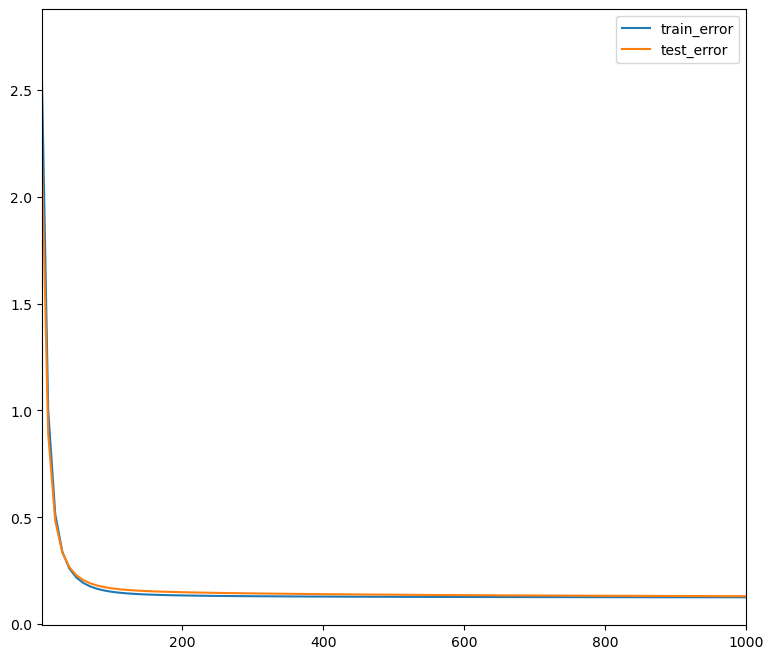

In [58]:
model = build_model(pivoted)
results = model.train(num_iterations=1000, learning_rate=.2)
print(results)

[defaultdict(<class 'list'>, {}), defaultdict(<class 'list'>, {})]
 iteration 15000: train_error_observed=0.042776, test_error_observed=0.054770, observed_loss=0.042776, regularization_loss=0.026333, gravity_loss=0.011950

[{'train_error_observed': 0.042776003, 'test_error_observed': 0.05476955},
 {'observed_loss': 0.042776003,
  'regularization_loss': 0.026332904,
  'gravity_loss': 0.011950268}]

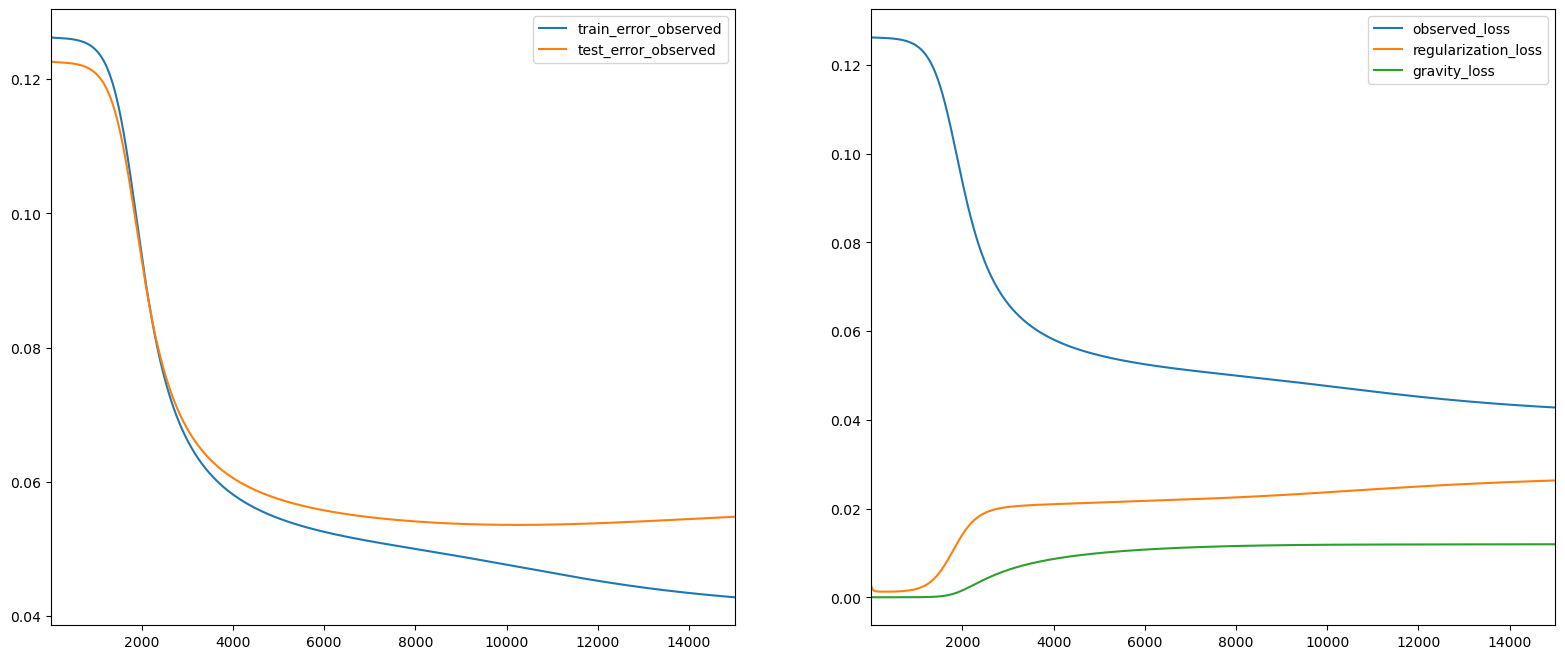

In [56]:
reg_model = build_regularized_model(
    pivoted, regularization_coeff=0.1, gravity_coeff=1.0, embedding_dim=5,
    init_stddev=.05)
reg_model.train(num_iterations=15000, learning_rate=.8)

In [32]:
print(model.embeddings)

{'genres': array([[-0.00344974,  0.02513968, -0.00026639],
       [ 0.00511966,  0.0081262 ,  0.02965648],
       [ 0.00735717,  0.01774493,  0.00655462],
       [ 0.04687444,  0.02338816,  0.07951818],
       [ 0.01130055,  0.0066841 , -0.00222997],
       [ 0.0022283 ,  0.00268324, -0.00589036],
       [ 0.00116625,  0.00778487,  0.00911284],
       [-0.00808064,  0.01445079, -0.0015518 ],
       [-0.02247052,  0.02168326, -0.01238619],
       [ 0.01043621,  0.04135582,  0.01040146],
       [ 0.00508019,  0.00739264,  0.04736912],
       [-0.00252666,  0.02533131, -0.00422029]], dtype=float32), 'users': array([[-1.1148406 , -0.7333525 , -0.8124678 ],
       [-0.38321102,  1.257758  ,  0.37124392],
       [ 0.8907848 ,  0.04938652, -0.49016908],
       ...,
       [ 0.47766656,  1.3515657 ,  0.20413068],
       [-0.3162643 ,  0.8059462 , -1.6299877 ],
       [ 0.14643595,  1.705368  ,  1.6912322 ]], dtype=float32)}


In [33]:
DOT = 'dot'
COSINE = 'cosine'
def compute_scores(query_embedding, item_embeddings, measure=DOT):
  """Computes the scores of the candidates given a query.
  Args:
    query_embedding: a vector of shape [k], representing the query embedding.
    item_embeddings: a matrix of shape [N, k], such that row i is the embedding
      of item i.
    measure: a string specifying the similarity measure to be used. Can be
      either DOT or COSINE.
  Returns:
    scores: a vector of shape [N], such that scores[i] is the score of item i.
  """
  print(query_embedding.shape)
  print(item_embeddings.shape)
  u = query_embedding
  V = item_embeddings
  if measure == COSINE:
    V = V / np.linalg.norm(V, axis=1, keepdims=True)
    u = u / np.linalg.norm(u)
  scores =u.dot(V.T)
  return scores

In [38]:
def user_recommendations(model, measure=DOT, exclude_rated=False, k=6, user = 0):
    scores = compute_scores(
        model.embeddings["users"][user], model.embeddings["genres"], measure)
    # score_key = measure + ' score'
    print(scores)
    df = pd.DataFrame(data = {
        'score_key': list(scores),
        'genres': pivoted.columns,
        # 'titles': pivoted['title'],
        # 'genres': pivoted['all_genres'],
    })
    return df.sort_values(by=["score_key"], ascending=False).iloc[:k]
    # if exclude_rated:
    #     # remove movies that are already rated
    #     rated_movies = ratings[ratings.user_id == "943"]["movie_id"].values
    #     df = df[df.movie_id.apply(lambda movie_id: movie_id not in rated_movies)]
    # display.display(df.sort_values([score_key], ascending=False).head(k))  

In [45]:
user_recommendations(reg_model, user=7)

(10,)
(12, 10)
[0.09259975 0.00570262 0.00134937 0.00066928 0.00736925 0.0013534
 0.00996675 0.02638445 0.09520864 0.00440337 0.00821323 0.01793677]


,score_key,genres
8,0.095209,Shooter
0,0.092600,Action
7,0.026384,Role-Playing
11,0.017937,Strategy
6,0.009967,Racing
10,0.008213,Sports
